In [1]:
!pip install torch

In [2]:
!pip install torchvision

In [5]:
!pip install pandas

In [2]:
import numpy as np

In [1]:
import sklearn

In [4]:
import pandas as pd

In [5]:
import torch

In [6]:
import matplotlib.pyplot as plt

In [8]:
advertising_data = pd.read_csv(r'C:\Users\clozy\opencv\Scripts\jpnb\DESIGNING\ensemble-NN-sol\4.0\Advertising.csv')

advertising_data.sample(10)

,delete,TV,radio,newspaper,sales
162,163,188.4,18.1,25.6,14.9
193,194,166.8,42.0,3.6,19.6
110,111,225.8,8.2,56.5,13.4
125,126,87.2,11.8,25.9,10.6
26,27,142.9,29.3,12.6,15.0
80,81,76.4,26.7,22.3,11.8
33,34,265.6,20.0,0.3,17.4
148,149,38.0,40.3,11.9,10.9
34,35,95.7,1.4,7.4,9.5
87,88,110.7,40.6,63.2,16.0


In [9]:
advertising_data.drop(['delete'], axis=1, inplace=True)

In [10]:
advertising_data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [11]:
advertising_data.shape

(200, 4)

In [12]:
#works well when all data is expressed in small values
from sklearn import preprocessing

In [13]:
#standardize all numeric features(centered around 0(subtract mean then /SD))
advertising_data[['TV']] = preprocessing.scale(advertising_data[['TV']])
advertising_data[['radio']] = preprocessing.scale(advertising_data[['radio']])
advertising_data[['newspaper']] = preprocessing.scale(advertising_data[['newspaper']])

In [14]:
advertising_data.sample(10)

,TV,radio,newspaper,sales
46,-0.669581,-0.902385,0.236880,10.6
122,0.898623,-1.408812,-0.688360,11.6
183,1.641273,1.332645,1.898628,26.2
195,-1.270941,-1.321031,-0.771217,7.6
98,1.665794,1.285378,0.950373,25.4
79,-0.362479,-1.050937,-0.343121,11.0
44,-1.423908,0.164487,0.586721,8.5
5,-1.615408,1.731034,2.045930,7.2
21,1.055093,-1.226498,-0.324708,12.5
199,0.993206,-0.990165,-1.005979,13.4


In [15]:
#set up X and Y variables
X = advertising_data.drop('sales', axis=1)

Y = advertising_data[['sales']]

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [18]:
x_train_tensor = torch.tensor(x_train.values, dtype = torch.float)
x_test_tensor = torch.tensor(x_test.values, dtype = torch.float)

y_train_tensor = torch.tensor(y_train.values, dtype = torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype = torch.float)

In [19]:
x_train_tensor.shape, y_train_tensor.shape

(torch.Size([160, 3]), torch.Size([160, 1]))

In [20]:
x_test_tensor.shape, y_test_tensor.shape

(torch.Size([40, 3]), torch.Size([40, 1]))

In [21]:
#dimensionality of input and output layers of neural networks
inp = 3
out = 1

#one hidden layer with 100 neurons
hid = 100

#loss fn that will be used to train the mode is the MSEloss()
loss_fn = torch.nn.MSELoss()

#determines how much model learns in every epoc(one pass model makes through data)
learning_rate = 0.0001 

In [22]:
#specification of layers in a sequence
#container object for other neural network layers
#1st layer is an input layer
#2nd layer ReLU activation
#3rd layer that will give us final output
model = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                           torch.nn.ReLU(),
                           torch.nn.Linear(hid, out))

In [24]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [25]:
#train NN for 10000 epocs
#loss calculates how far our model predictions are from actual values
#every iter prints out value of loss
for iter in range(10000):
    
    y_pred = model(x_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)
    
    if iter % 1000 == 0:
        print(iter, loss.item())
      
    #gradients update model parameters to improve model
    optimizer.zero_grad()
    loss.backward()#to calculate gradients
    
    #update models parameters
    optimizer.step()

0 232.10714721679688
1000 134.79269409179688
2000 40.79946517944336
3000 9.218621253967285
4000 6.252560615539551
5000 4.757742404937744
6000 3.30403470993042
7000 2.047065258026123
8000 1.134545922279358
9000 0.5715802907943726


In [28]:
#model perfomance on test data
y_pred_tensor = model(x_test_tensor)

y_pred_tensor[:5]

tensor([[ 9.9847],
        [ 8.3132],
        [ 9.0863],
        [25.5548],
        [11.6884]], grad_fn=<SliceBackward>)

In [29]:
#numpy format
y_pred = y_pred_tensor.detach().numpy()

y_pred[:5]

array([[ 9.984665],
       [ 8.313227],
       [ 9.086298],
       [25.554758],
       [11.68837 ]], dtype=float32)

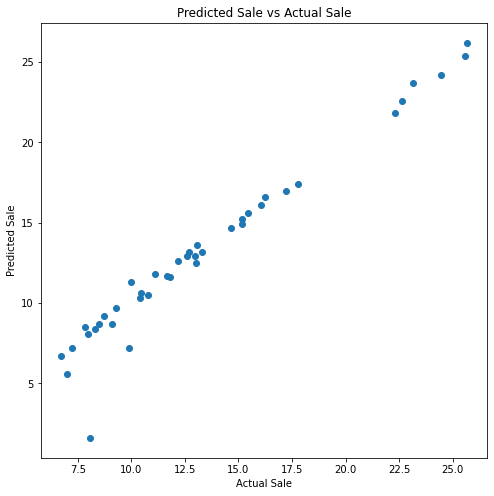

In [30]:
##scatter plot representation
plt.figure(figsize=(8, 8))

plt.scatter(y_pred, y_test.values)

plt.xlabel("Actual Sale")
plt.ylabel("Predicted Sale")

plt.title("Predicted Sale vs Actual Sale")
plt.show()

In [31]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred) 

0.9550622526139338